# FEM test 1: Uniform Mesh

The finer the mesh used for an FEM solution
the better is the expected accuracy
and the more the computational cost.

We shall examine this statement
for the Poisson's problem in 2D here.

In [1]:
import numpy as np
import triangle as tr

from poisson_2d import Poisson_2d

import matplotlib.pyplot as plt

In [12]:
def u(x,y):
    # return np.where(y == 1, 1, 0)
    # return np.sin(np.pi*x)*np.sin(np.pi*y)
    return x**2*y**2
    # return x*y

def f(x,y):
    # return 0
    # return 2*(np.pi)**2*np.sin(np.pi*x)*np.sin(np.pi*y)
    return -2*(x**2 + y**2)
    # return 0

We will solve the [MMS](https://rajarshi99.github.io/research/notes/mms.pdf)
defined by the above functions $u$ and $f$
in the 2D square domain $-1 < x,y < 1$.
The mesh will be refined
by reducing the diameter of the elements by half
and the problem will be solved with the new mesh.
These solutions will be examined for accuracy
and the time taken.

In [13]:
num_solves = 5
p_2d_list = []
h_mean_list = []
err_estim_list = []


for i in range(num_solves):
    num_points_1d = (i+2)**2
    x_1d = np.linspace(-1,1,num_points_1d)
    y_1d = np.linspace(-1,1,num_points_1d)
    x,y = np.meshgrid(x_1d,y_1d)
    x = x.flatten()
    y = y.flatten()

    domain = {'vertices' : np.column_stack((x,y))}
    for key, val in tr.triangulate(domain).items():
        domain[key] = val
    p_2d = Poisson_2d(domain, u, f)
    p_2d.sol_FEM()
    
    h_mean = p_2d.h_values().mean()  # The mean of the diameters of the elements which is redundant for this example
    err_estim = p_2d.l2_err(u(p_2d.x, p_2d.y)) # Error estimate from the known solution at the nodal points

    p_2d_list.append(p_2d)
    h_mean_list.append(h_mean)
    err_estim_list.append(err_estim)

Let us view one of the numerical solutions.

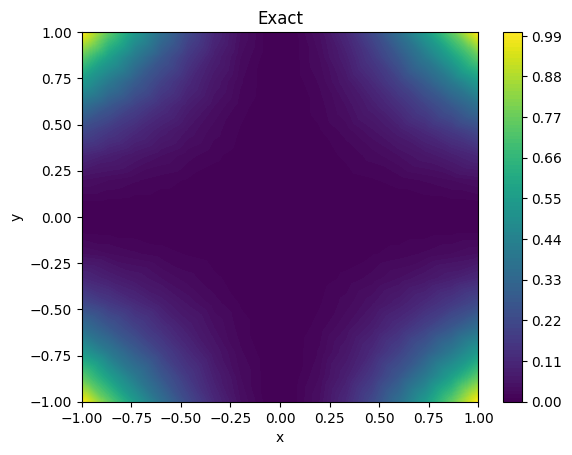

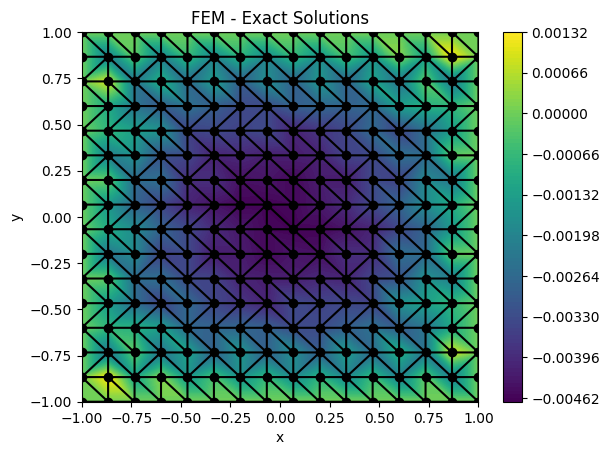

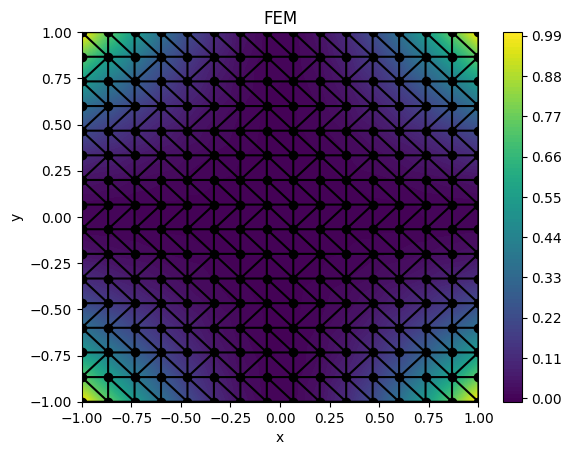

The time taken in s for the job is stored in the list [[0.012400388717651367, 'Forming K and f as dict'], [0.014170646667480469, 'Forming K and f the global quantities'], [0.000354766845703125, 'Calling linear solver'], [2.0742416381835938e-05, 'Assembling u_sol']]


In [14]:
p_2d = p_2d_list[2]

x = p_2d.x
y = p_2d.y

u_exact = u(x,y)
u_sol = p_2d.u_sol
p_2d.plot_on_mesh(u_exact, title = "Exact", plot_with_lines = False)
p_2d.plot_on_mesh(u_sol - u_exact, title = "FEM - Exact Solutions")
p_2d.plot_sol_on_mesh(title = "FEM")

print("The time taken in s for the job is stored in the list", p_2d.time_logs)

Now let us plot the error estimate

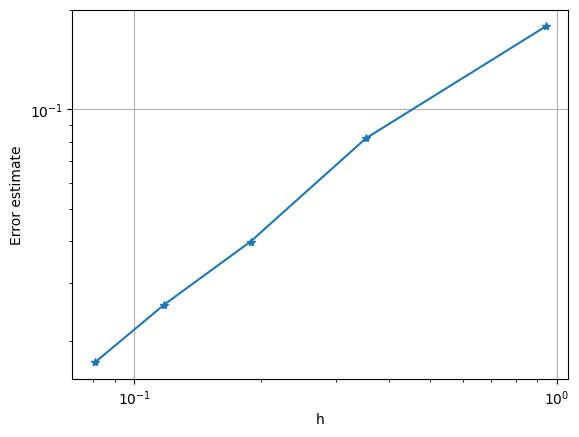

In [15]:
plt.plot(h_mean_list, err_estim_list, '-*')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('h')
plt.ylabel('Error estimate')

plt.grid()
plt.show()

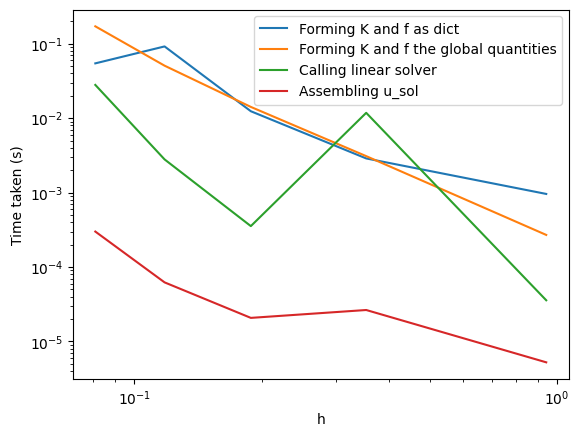

In [16]:
collected_time_logs = {}

for p_2d in p_2d_list:
    for item in p_2d.time_logs:
        message = item[1]
        if message in collected_time_logs:
            collected_time_logs[message].append(item[0])
        else:
            collected_time_logs[message] = [item[0]]

for label,time_taken in collected_time_logs.items():
    #print(label, time_taken)
    plt.plot(h_mean_list, time_taken, label = label)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('h')
plt.ylabel('Time taken (s)')

plt.legend()
plt.show()